# Credit Card Customer Segmentation 

**Project Overview:**

In this project, we’ll play the role of a data scientist working for a credit card company. We’ve been given a dataset containing information about the company’s clients and asked to help segment them into different groups in order to apply different business strategies for each type of customer.

The company expects to receive a group for each client and also an explanation of the characteristics of each group and the main points that make them different.

In a planning meeting with the Data Science coordinator, it was decided that we should use the K-means algorithm to segment the data.

In order to use the algorithm properly and achieve all the goals that the company has set for us, we'll go through the following steps:

* Analyse the dataset;
* Prepare the data for modeling;
* Find an appropriate number of clusters;
* Segment the data;
* Interpret and explain the results.


### Data Dictionary:

* `customer_id`: unique identifier for each customer.
* `age`: customer age in years.
* `gender`: customer gender (M or F).
* `dependent_count`: number of dependents of each customer.
* `education_level`: level of education ("High School", "Graduate", etc.).
* `marital_status`: marital status ("Single", "Married", etc.).
* `estimated_income`: the estimated income for the customer projected by the data science team.
* `months_on_book`: time as a customer in months.
* `total_relationship_count`: number of times the customer contacted the company.
* `months_inactive_12_mon`: number of months the customer did not use the credit card in the last 12 months.
* `credit_limit`: customer's credit limit.
* `total_trans_amount`: the overall amount of money spent on the card by the customer.
* `total_trans_count`: the overall number of times the customer used the card.
* `avg_utilization_ratio`: daily average utilization ratio. 0

## Part 1: Data Exploration

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [127]:
# Load the data
df = pd.read_csv("customer_segmentation.csv")

df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


In [128]:
df.shape

(10127, 14)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [130]:
# Checking for missing values
df.isnull().sum()

customer_id                 0
age                         0
gender                      0
dependent_count             0
education_level             0
marital_status              0
estimated_income            0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
credit_limit                0
total_trans_amount          0
total_trans_count           0
avg_utilization_ratio       0
dtype: int64

The dataset has a total of 14 columns and 10127 rows, with no missing values.
Most of the columns are numeric, with only 3 columns stored as string object. 

### 1.1: Exploring Numerical Columns

In [131]:
# Exploring numerical columns
df.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


The summary statistics of the data tells us that;
* The mininum age for credit card customers is 26, and the maximum is 73
* The minimum estimated income is $20,000 and the maximum is $200,000
* The customers in this dataset have being with this company for at least 13 months.
* The credit limit of most customers is better $1,438 to $34,516, and most of the customers spend an average of $4,404
* I can also see that the minimum amount of times a customer has used their credit card is 10 and the maximum is 139 times.

The data looks good so far, and nothing stands out as suspicious.

Next is to explore the columns with categorical data

### 1.2: Exploring Categorical Columns

In [132]:
# Exploring categorical columns
df.select_dtypes(include='O').describe()

,gender,education_level,marital_status
count,10127,10127,10127
unique,2,6,4
top,F,Graduate,Married
freq,5358,3685,4687


In [133]:
df.gender.value_counts()

F    5358
M    4769
Name: gender, dtype: int64

In [134]:
df.marital_status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

In [135]:
df.education_level.value_counts()

Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

Majority of the customers are female, married and passed through graduate school

### 1.3: Checking for correlations between columns

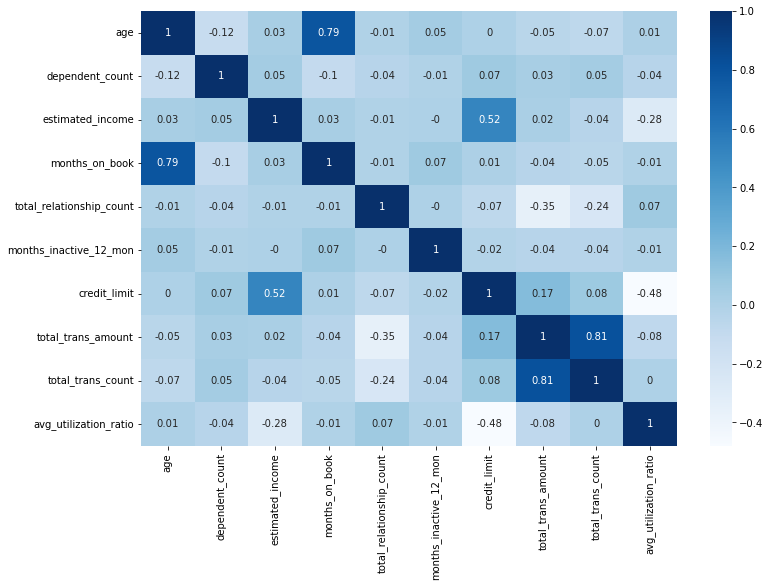

In [136]:
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(round(df.drop('customer_id', axis=1).corr(), 2), cmap='Blues', annot=True, ax=ax)

plt.show()

Only a few columns have correlations that stand out:
* `age` is strongly correlated with `months_on_book`, which makes sense if you think about it. This means that older customers have been with the company for longer. It also means that the company attracts young customers and provide them with quality service for many years.

* `credit_limit` has a positive correlation with `estimated_income`. This also makes sense because the more money you earn, the higher your credit limit.
* `total_trans_count` has a very high positive corrleation with `total_amount_amount`. This can be easily explained as the higher the number of times you use your credit card, the higher the amount of money you spend. 

### 1.4: Visualizing Distributions of Data in Numerical Columns

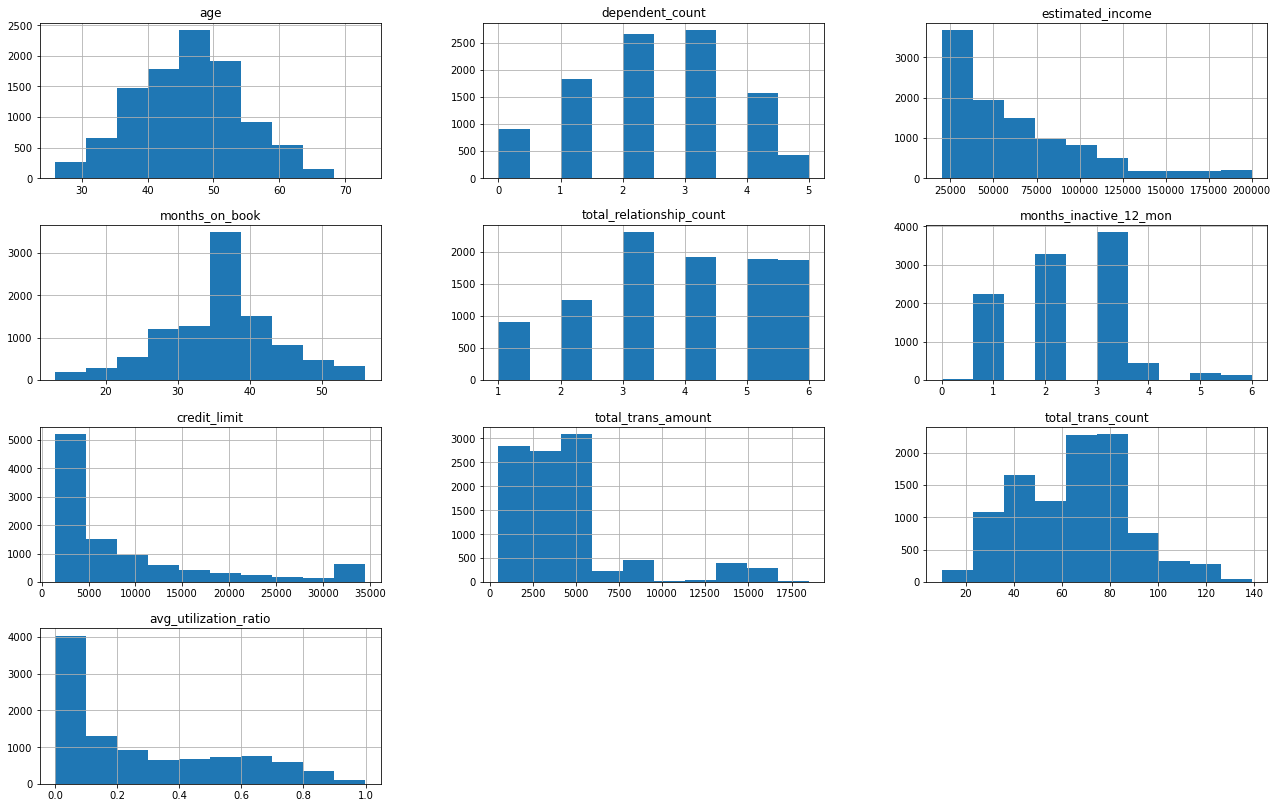

In [137]:
fig, ax = plt.subplots(figsize=(22, 14))

# Plotting all numerical columns, except the customer's id column
df.drop('customer_id', axis=1).hist(ax=ax)

#plt.tight_layout()
plt.show()

## Part 2: Feature Engineering

The dataset contain 3 categorical columns, as observed from the data exploration. These columns will need to be encoded to numerical values. 

The categorical variables are both ordinal and nominal, so they will need to be encoded using different strategies.

The ordinal categorical variable is the `education_level` column, because there is an intrinsic order in the categories:

`gender` and `marital_status` are both nominal categorical variables. 

### 2.1: Encoding Categorical data

In [138]:
# Encoding the 'gender' column
new_df = df.copy()
new_df['gender'] = new_df['gender'].apply(lambda x: 1 if x == 'M' else 0)
print(f"Count of Male(1) and Female(0):\n{new_df.gender.value_counts()}\n")

# Encoding the 'education_level' column
new_df['education_level'].replace(to_replace={'Uneducated': 0, 'High School': 1, 'College':2,
                                    'Graduate': 3, 'Post-Graduate': 4, 'Doctorate':5}, inplace=True)

print(f"Count of each education level:\n{new_df['education_level'].value_counts()}")


Count of Male(1) and Female(0):
0    5358
1    4769
Name: gender, dtype: int64

Count of each education level:
3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: education_level, dtype: int64


In [139]:
# Encoding values for the 'marital_status' column
dummies = pd.get_dummies(new_df[['marital_status']], dtype=int, drop_first=True)

new_df = pd.concat([new_df, dummies], axis=1)

new_df.drop('marital_status', axis=1, inplace=True)

new_df.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,1,0,0


### 2.2: Standardizing the data

Since K-Means is a distance-based algorithm, all the data need to be on the same scale to prevent some features from having more weight than others. Scaling the data is a way to put the datapoints in each column on the same scale. 

The StandardScaler function from Sklearn scales the data, so that each column will have a mean on 0 and standard deviation of 1

In [140]:
X = new_df.drop('customer_id', axis=1)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [184]:
X = pd.DataFrame(X_scaled)

X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## Part 3: Building a K-Means Clustering Model

### 3.1: Selecting the best number for K

The next step is to decide the best number of clusters to use in the segmentation according to the inertia metric, using the Elbow method. I'll also use the Silhoutte method and DB-Index to verify the best option for K.

### 3.1.1: Using the Elbow Method

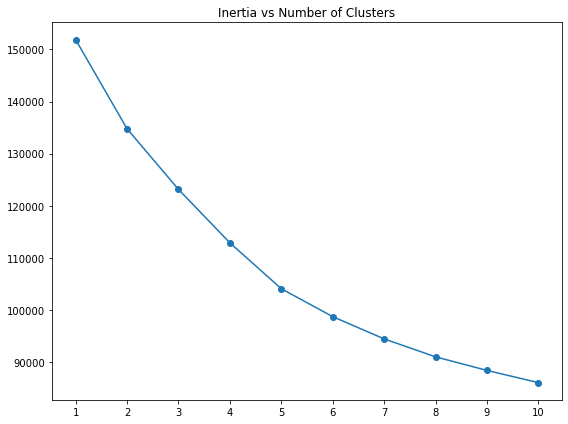

In [143]:
inertias = []

for k in range(1, 11):
    model = KMeans(n_clusters=k)
    y = model.fit_predict(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

From the plot above (for the elbow method), it's not very clear which number is best for K. Although, there is sharp bend at number 5. 

### 3.1.2: Using the Silhouette Method

The silhouette method is a technique used to determine the optimal number of clusters for an unsupervised learning algorithm. 

When using this method, the model determines the average silhouette for each value of k, and the value of k which has the maximum silhouette value is considered the optimal number of clusters for the clustering algorithm.

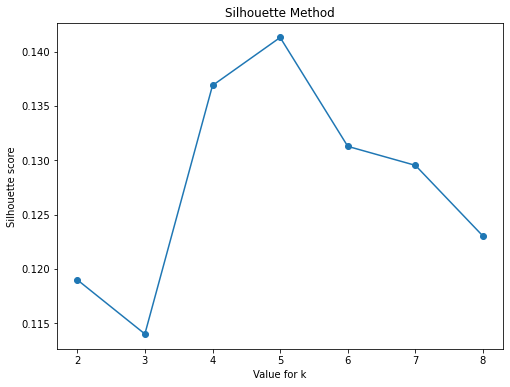

In [147]:
k = [2, 3, 4, 5, 6, 7, 8]
score=[]

for n_cluster in k:
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    score.append(silhouette_score(X,kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(k, score, 'o-')
plt.xlabel("Value for k")
plt.ylabel("Silhouette score")
plt.title('Silhouette Method')
plt.show()

5 has the maximum silhouette value, this means that 5 is the optimal number of cluster for this dataset.

### 3.2: Training the model

In [148]:
# Training the model with K = 5
model = KMeans(n_clusters=5, max_iter=500)
y = model.fit_predict(X_scaled)

y

array([2, 1, 2, ..., 3, 0, 3])

In [149]:
# Assigning clusters to the data
df['Cluster'] = y + 1

df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,Cluster
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,3
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,2
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,3
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,1
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,4


## Part 4: Analyzing & Interpreting Results


All that's left now is to analyze the results. The next step is to see how the variables used in the clustering differ from cluster to cluster in order better explain what each cluster represents.

In [151]:
df['Cluster'].value_counts()

4    3451
2    2969
3    2005
5     963
1     739
Name: Cluster, dtype: int64

In [182]:
df.groupby('Cluster')[['age', 'estimated_income', 'dependent_count', 'months_on_book', 'credit_limit', 
            'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']].mean()

,age,estimated_income,dependent_count,months_on_book,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
Cluster,,,,,,,,
1,45.602165,61577.807848,2.549391,35.217862,9284.996076,4576.435724,66.462788,0.258486
2,45.800269,46474.570562,2.212866,35.497137,4957.055035,3742.910408,65.305490,0.322616
3,46.834913,111180.049875,2.528678,36.293766,18820.138653,3157.547132,55.685287,0.082090
4,46.914518,45040.278180,2.314402,36.452622,4056.450188,3273.505071,58.149812,0.379970
5,45.333333,69394.600208,2.335410,35.164071,14645.377985,12957.161994,105.391485,0.165227


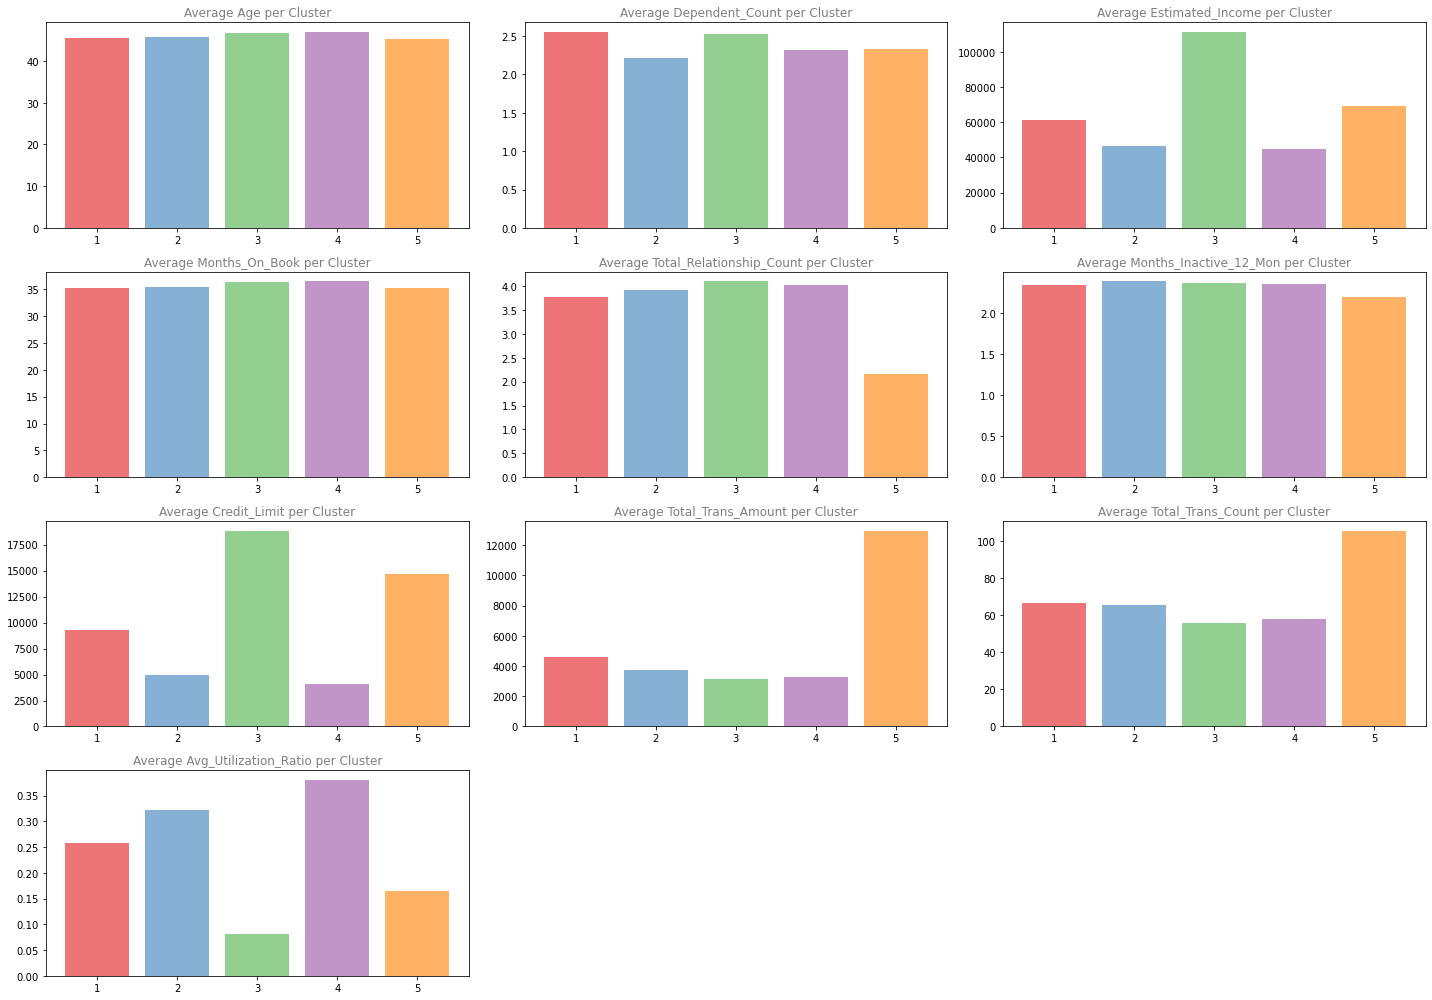

In [161]:
numeric_columns = df.select_dtypes(include=np.number).drop(['customer_id', 'Cluster'], axis=1).columns

fig = plt.figure(figsize=(20, 14))
for i, column in enumerate(numeric_columns):
    df_plot = df.groupby('Cluster')[column].mean()
    ax = fig.add_subplot(4, 3, i+1)
    ax.bar(df_plot.index, df_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
    ax.xaxis.grid(False)
    
plt.tight_layout()
plt.show()

Characteristics of each cluster based on the table and plots above:

`Cluster 1`: Medium income earners, medium credit limit, and an average utilization ratio of 0.26

`Cluster 2`: Low income, low credit limit, low transaction amount and an average utilization ratio of 0.32

`Cluster 3`: High income, high credit limit, low transaction and average utilization ratio of 0.08

`Cluster 4`: Low income, low credit limit, low transaction amount and an average utilization ratio of 0.38

`Cluster 5`: Medium income, high credit limit, high transaction amount and an average utilization ratio of 0.17

In [175]:
pd.crosstab(index=df['Cluster'], columns=df['gender'])

gender,F,M
Cluster,,
1,380,359
2,2060,909
3,68,1937
4,2513,938
5,337,626


In [178]:
pd.crosstab(index=df['Cluster'], columns=df['marital_status'])

marital_status,Divorced,Married,Single,Unknown
Cluster,,,,
1,0,0,0,739
2,125,0,2844,0
3,232,1081,692,0
4,302,3149,0,0
5,89,457,407,10


In [177]:
pd.crosstab(index=df['Cluster'], columns=df['education_level'])

education_level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated
Cluster,,,,,,
1,83,30,264,176,59,127
2,350,166,1080,674,169,530
3,237,99,722,482,116,349
4,414,189,1270,789,220,569
5,108,44,349,230,52,180


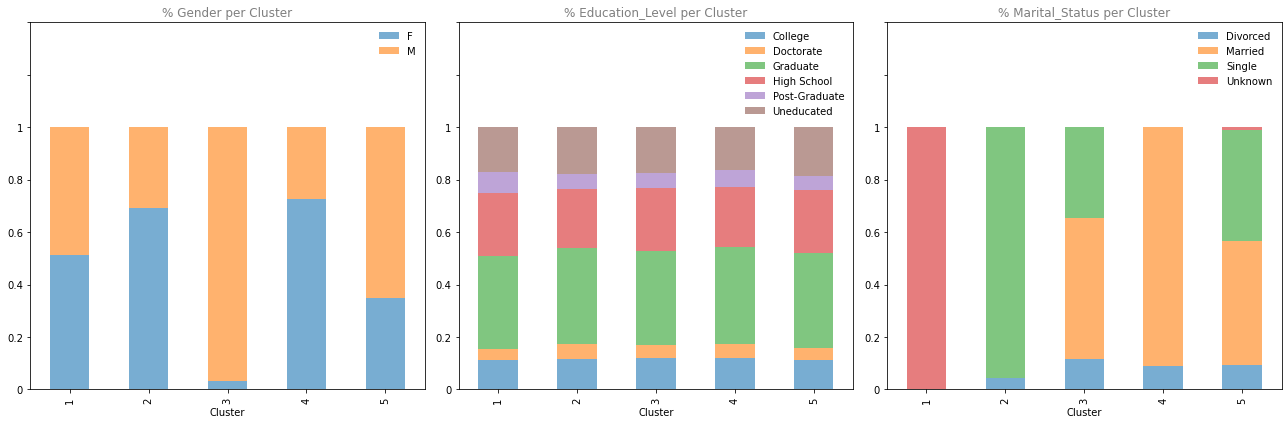

In [181]:
cat_columns = df.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18, 6))

for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=df['Cluster'], columns=df[col], values=df[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1, 3, i+1)
    plot_df.plot.bar(stacked=True, ax=ax, alpha=0.6)
    ax.set_title(f'% {col.title()} per Cluster', alpha=0.5)

    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
#plt.show()

For the categorical features, what stands out the most from the 3 plots above is that: 
* `Cluster 1` has an equal distribution of men and women with unknown marital status
* `Cluster 2` is mostly single people (mostly women)
* `Cluster 3` is mostly men, both married and single (but mostly married)
* `Cluster 4` is mostly married women
* `Cluster 5` is both single and married people, but mostly men

It's very clear that educational levels are well divided between all clusters, nothing stands out here. 

In [183]:
# Each customer in the dataset has been assigned a cluster
df[['customer_id', 'Cluster']]

,customer_id,Cluster
0,768805383,3
1,818770008,2
2,713982108,3
3,769911858,1
4,709106358,4
...,...,...
10122,772366833,5
10123,710638233,2
10124,716506083,4
10125,717406983,1


## Conclusion

By taking note of the most important characteristics of each cluster, we can draw some valuable insights on how to better tailor both business and marketing strategies to better meet the needs of each type of customer.

Each customer in the dataset has been assigned to a cluster, here are the general features of each cluster:

`Cluster 1`: This cluster represents individuals with moderate incomes and credit limits who use their credit cards moderately, regardless of gender and marital status, suggesting a balanced approach to credit card usage.

`Cluster 2`: This group consists of financially cautious, predominantly single women with limited income and credit access, indicating a focus on controlled credit usage while managing within their financial means.

`Cluster 3`: This cluster signifies affluent, responsible married men who use credit sparingly for high-value transactions, showcasing strong financial stability and a preference for controlled credit card usage.

`Cluster 4`: This cluster consists of mostly married or divorced women with lower incomes and credit limits, exhibiting conservative credit behavior and lower transaction volumes, possibly driven by their financial circumstances.

`Cluster 5`: Both married and single men in this cluster enjoy higher credit limits, engage in substantial transactions, and maintain a reasonable credit utilization ratio, highlighting a balanced and proactive credit usage pattern.